<a href="https://colab.research.google.com/github/ProsperChuks/wine-quality-prediction/blob/main/base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load DataSet

In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/Wine Quality Project/winequality-red.csv'

dataframe = pd.read_csv(path, error_bad_lines=False)
dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Processing the data

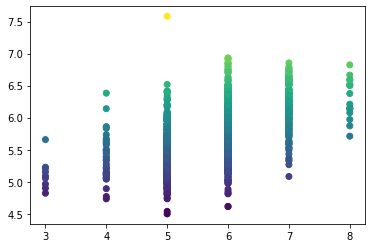

In [15]:
correlation = dataframe.corr()['quality'].drop(['quality'])

columns_to_drop = ['citric acid', 'chlorides',
                   'residual sugar','quality',
                   'free sulfur dioxide',
                   'total sulfur dioxide',
                   'pH', 'sulphates']

scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(dataframe.drop(columns_to_drop, axis=1))
features = pd.DataFrame(normalized_df, columns=dataframe.drop(columns_to_drop, axis=1).columns)
target = dataframe['quality']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=30)
model = LinearRegression().fit(x_train, y_train)
pred = model.predict(x_train)

plt.scatter(y_train, pred, c=pred)

In [16]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train, pred)
print('%.3f'%mae)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_train, pred))
print('%.3f'%rmse)

from sklearn.metrics import r2_score
r2 = r2_score(y_train, pred)
print('%.3f'%r2)

0.525
0.666
0.317
